<a id="top"></a>
# Table of contents

#### 1. [Package instalation (optional)](#1)
#### 2. [Data loading](#2)
#### 3. [EDA](#3)
- ##### 3.1. [Understanding data types](#3_1)
- ##### 3.2. [Understanding features](#3_2)
- - ##### 3.2.1. [Content score](#3_2_1)
- - ##### 3.2.2. [Wording score](#3_2_2)
- - ##### 3.2.3. [Content vs Wording](#3_2_3)
- ##### 3.3. [Tokenization](#3_3)
- ##### 3.4. [Word and character count](#3_4)
- - ##### 3.4.1. [prompts_train dataset](#3_4_1)
- - ##### 3.4.2. [summaries_train dataset](#3_4_2)
- ##### 3.5. [Word and character count after removing stopwords](#3_5)
- - ##### 3.5.1. [prompts_train dataset](#3_5_1)
- - ##### 3.5.2. [summaries_train dataset](#3_5_2)
- ##### 3.6. [N-gram analysis](#3_6)
- - ##### 3.6.1. [prompts_train dataset](#3_6_1)
- - ##### 3.6.2. [summaries_train dataset](#3_6_2)
- ##### 3.7. [Word Clouds](#3_7)
- - ##### 3.7.1. [prompts_train dataset](#3_7_1)
- - ##### 3.7.2. [summaries_train dataset](#3_7_2)
- ##### 3.8. [Sentiment Analysis](#3_8)
- - ##### 3.8.1. [prompts_train dataset](#3_8_1)
- - - ##### 3.8.1.1 [Polarity](#3_8_1_1)
- - - ##### 3.8.1.2 [Subjectivity](#3_8_1_2)
- - - ##### 3.8.1.3 [Readability](#3_8_1_3)
- - ##### 3.8.2. [summaries_train dataset](#3_8_2)
- - - ##### 3.8.2.1 [Polarity](#3_8_2_1)
- - - ##### 3.8.2.2 [Subjectivity](#3_8_2_2)
- - - ##### 3.8.2.3 [Readability](#3_8_2_3)

<a id="1"></a>
## 1. Package installation

If you already have these packages installed you can simply leave all the lines commented out. Otherwise, uncomment everything out and run the code.

In [1]:
#!pip install pandas
#!pip install plotly
#!pip install nbformat --upgrade
#!pip install plotly cufflinks
#!pip install wordcloud
#!pip install textblob
#!pip install textstat

<a id="2"></a>
## 2. Data loading

We will only concentrate on train data: "summaries_train.csv" and "prompts_train.csv".

In [2]:
import pandas as pd
from IPython.display import display

In [3]:
summaries_train_df = pd.read_csv('../data/summaries_train.csv')
prompts_train_df = pd.read_csv('../data/prompts_train.csv')

Showing the content of both dataframes

In [4]:
print("summaries_train dataframe:")
display(summaries_train_df.head(1))
print("prompts_train dataframe:")
display(prompts_train_df.head(1))

summaries_train dataframe:


student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   

    content   wording  
0  0.205683  0.380538

prompts_train dataframe:


prompt_id                                    prompt_question prompt_title  \
0    39c16e  Summarize at least 3 elements of an ideal trag...   On Tragedy   

                                         prompt_text  
0  Chapter 13 \r\nAs the sequel to what has alrea...

###### [Go to top](#top)

<a id="3"></a>
## 3. EDA

<a id="3_1"></a>
#### 3.1 Understanding data types

For better understanding of the data, it is worth to understand datatypes used in a dataframe.

In [5]:
def deep_type(obj):
    if isinstance(obj, (list, tuple, set, pd.core.series.Series)):
        if obj:
            return type(obj).__name__ + " of " + deep_type(obj[0])
        else:
            return type(obj).__name__
    else:
        return type(obj).__name__

def print_column_types(df):
    # Determine the maximum column name length for alignment
    max_col_len = max(len(col) for col in df.columns)

    for column in df.columns:
        first_non_na = df[column].dropna().iloc[0] if not df[column].isna().all() else None
        if first_non_na is not None:
            print(f"column: {column:<{max_col_len}} \t type: {deep_type(first_non_na)}")
        else:
            print(f"column: {column:<{max_col_len}} \t type: {type(first_non_na).__name__}")

In [6]:
print("summaries_train dataframe:\n")
print_column_types(summaries_train_df)
display(summaries_train_df.head(1))

print("prompts_train dataframe:\n")
print_column_types(prompts_train_df)
display(prompts_train_df.head(1))

summaries_train dataframe:

column: student_id 	 type: str
column: prompt_id  	 type: str
column: text       	 type: str
column: content    	 type: float64
column: wording    	 type: float64


student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   

    content   wording  
0  0.205683  0.380538

prompts_train dataframe:

column: prompt_id       	 type: str
column: prompt_question 	 type: str
column: prompt_title    	 type: str
column: prompt_text     	 type: str


prompt_id                                    prompt_question prompt_title  \
0    39c16e  Summarize at least 3 elements of an ideal trag...   On Tragedy   

                                         prompt_text  
0  Chapter 13 \r\nAs the sequel to what has alrea...

###### [Go to top](#top)

<a id="3_2"></a>
#### 3.2 Understanding features

In order to fully understand data, one must understand each feature of the dataset.  
This is discussed next.

In [7]:
print(f'Number of entries in the summaries_train_df: {len(summaries_train_df)}')
print(f"Number of unique 'student_id' values in summaries_train_df: {len(summaries_train_df['student_id'].unique())}")
print(f"Number of unique 'prompt_id' values in summaries_train_df: {len(summaries_train_df['prompt_id'].unique())}")
print(f"Number of summaries in summaries_train_df: {len(summaries_train_df['text'])}\n")

print(f'Number of entries in the prompts_train_df: {len(prompts_train_df)}')
print(f"Number of unique 'prompt_id' values in prompts_train_df: {len(prompts_train_df['prompt_id'].unique())}")
print(f"Number of 'prompt_question' values in prompts_train_df: {len(prompts_train_df['prompt_question'].unique())}")
print(f"Number of 'prompt_title' values in prompts_train_df: {len(prompts_train_df['prompt_title'].unique())}\n")

print(f"Unique 'prompt_id' values in summaries_train_df: {summaries_train_df['prompt_id'].unique()}")
print(f"Unique 'prompt_id' values in prompts_train_df: {prompts_train_df['prompt_id'].unique()}")

Number of entries in the summaries_train_df: 7165
Number of unique 'student_id' values in summaries_train_df: 7165
Number of unique 'prompt_id' values in summaries_train_df: 4
Number of summaries in summaries_train_df: 7165

Number of entries in the prompts_train_df: 4
Number of unique 'prompt_id' values in prompts_train_df: 4
Number of 'prompt_question' values in prompts_train_df: 4
Number of 'prompt_title' values in prompts_train_df: 4

Unique 'prompt_id' values in summaries_train_df: ['814d6b' 'ebad26' '3b9047' '39c16e']
Unique 'prompt_id' values in prompts_train_df: ['39c16e' '3b9047' '814d6b' 'ebad26']


There are in total 7165 entries in "summaries_train_df", each written by a different student.  
Every summary ("text" column in "summaries_train_df") is written according to 1 of 4 questions/tasks defined in the "prompt_question" column of "prompts_train_df". Every "prompt_question" corresponds to exactly one "prompt_title" (also in "prompts_train_df") which describes it shortly.  
Finally, "prompt_text" column (also in "prompts_train_df") stores the full texts that students have to summarize. 
  
For every summary, student is awarded content score ("content" column in summaries_train_df) and wording score ("wording" column in "summaries_train_df").

###### [Go to top](#top)

<a id="3_2_1"></a>
##### 3.2.1 Content score

Based on competition host's notes, the content score is accounting for 3 factors:

- Main idea (i.e. How well did the summary capture the main idea of the source?)  

- Details (i.e. How accurately did the summary capture the details from the source?)  

- Cohesion (i.e. How well did the summary transition from one idea to the next?)

In [8]:
import cufflinks as cf
cf.go_offline()

In [9]:
summaries_train_df['content'].iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Content score distribution',
        title_x=0.5,
        xaxis=dict(title='content score'),
        yaxis=dict(title='count')
    ),
    color='blue')

The content score ranges from roughly -2 to +4 which points to possible data transformation. This can be checked by looking at the column summary.

In [10]:
summaries_train_df['content'].describe()

count    7165.000000
mean       -0.014853
std         1.043569
min        -1.729859
25%        -0.799545
50%        -0.093814
75%         0.499660
max         3.900326
Name: content, dtype: float64

By closer inspection, one can see that the range of the content score is between -1.73 and 3.9. The mean and standard deviation are very close to 0 and 1, respectively, which points to the data standardization.  

At this point, it is not clear how these scores map to actual grades.

###### [Go to top](#top)

<a id="3_2_2"></a>
##### 3.2.2 Wording score

Based on competition host's notes, the wording score is accounting for 3 factors:

- Voice (i.e. Was the summary written using objective language?)  

- Paraphrase (i.e. Is the summary properly paraphrased?)  

- Language (i.e. How well did the summary use lexis and the syntax) 

In [11]:
summaries_train_df['wording'].iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Wording score distribution',
        title_x=0.5,
        xaxis=dict(title='wording score'),
        yaxis=dict(title='count')
    ),
    color='blue')

Wording score ranges roughly from -2 to 4.3. It is reasonable to expect that the same data transformation technique was applied on the wording score as on the content score.

In [12]:
summaries_train_df['wording'].describe()

count    7165.000000
mean       -0.063072
std         1.036048
min        -1.962614
25%        -0.872720
50%        -0.081769
75%         0.503833
max         4.310693
Name: wording, dtype: float64

The minimum value for wording is -1.96, while the maximum value is 4.31. As expected, mean and standard deviation are very close to 0 and 1, respectively, which suggests that data standardization was applied on wording score as well.

As is the case for content score, it is not clear, at this moment, the meaning behind content score values.

###### [Go to top](#top)

<a id="3_2_3"></a>
##### 3.2.3 Content vs Wording

By looking at content score distribution, we can see that the wording score distribution is multimodal, although this is harder to see due to corse binning. The same can be said for wording score distribution.  

One can see clusters better if the number of binning is increased

In [13]:
summaries_train_df['content'].iplot(
    kind='hist',
    bins=360,
    layout=dict(
        title='Content score distribution (finer binning)',
        title_x=0.5,
        xaxis=dict(title='content score'),
        yaxis=dict(title='count')
    ),
    color='blue')

summaries_train_df['wording'].iplot(
    kind='hist',
    bins=360,
    layout=dict(
        title='Wording score distribution (finer binning)',
        title_x=0.5,
        xaxis=dict(title='wording score'),
        yaxis=dict(title='count')
    ),
    color='blue')

As one can see, there appears to be several overlapping Gauss-like distributions which points to possible existence of clusters. One thing to try is to prepare a (content, wording) scatter plot to find possible clusters. 

In [14]:
import plotly.graph_objs as go

scatter_plot = go.Scatter(
    x=summaries_train_df['content'],
    y=summaries_train_df['wording'],
    mode='markers',
    marker=dict(size=5, color='blue'),  # Adjust the size as needed
)

layout = go.Layout(
    xaxis=dict(title='content score'),
    yaxis=dict(title='Wording Score'),
    title='Content score vs. Wording score',
    title_x=0.5,
)

fig = go.Figure(data=[scatter_plot], layout=layout)
fig.show()

From the scatter plot, it can be seen that there exists 37 clusters. This is more clear if on applies 30° rotation on both content and wording scores. 

In [15]:
import numpy as np

angle_deg = 30
angle_rad = np.radians(angle_deg)
rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                            [np.sin(angle_rad), np.cos(angle_rad)]])

rotated_values = np.dot(summaries_train_df[['content', 'wording']].values, rotation_matrix)
summaries_train_df['content_rotated'] = rotated_values[:, 0]
summaries_train_df['wording_rotated'] = rotated_values[:, 1]

In [16]:
# rotated content score
scatter_plot = go.Scatter(
    x=summaries_train_df['content_rotated'],
    mode='markers',
    marker=dict(size=5, color='blue'),  # Adjust the size as needed
)

layout = go.Layout(
    xaxis=dict(title='content score'),
    #yaxis=dict(title='Wording Score'),
    title='Rotated content score',
    title_x=0.5,
)

fig = go.Figure(data=[scatter_plot], layout=layout)
fig.show()

# rotated wording score
scatter_plot = go.Scatter(
    x=summaries_train_df['wording_rotated'],
    mode='markers',
    marker=dict(size=5, color='blue'),  # Adjust the size as needed
)

layout = go.Layout(
    xaxis=dict(title='wording score'),
    #yaxis=dict(title='Wording Score'),
    title='Rotated wording score',
    title_x=0.5,
)

fig = go.Figure(data=[scatter_plot], layout=layout)
fig.show()

# rotated content score vs. rotated wording score
scatter_plot = go.Scatter(
    x=summaries_train_df['content_rotated'],
    y=summaries_train_df['wording_rotated'],
    mode='markers',
    marker=dict(size=5, color='blue'),  # Adjust the size as needed
)

layout = go.Layout(
    xaxis=dict(title='content score'),
    yaxis=dict(title='Wording Score'),
    title='Content score vs. Wording score',
    title_x=0.5,
)

fig = go.Figure(data=[scatter_plot], layout=layout)
fig.show()

In [17]:
summaries_train_df['content_rotated'].iplot(
    kind='hist',
    bins=360,
    layout=dict(
        title='Rotated content score distribution',
        title_x=0.5,
        xaxis=dict(title='content score'),
        yaxis=dict(title='count')
    ),
    color='blue')

summaries_train_df['wording'].iplot(
    kind='hist',
    bins=360,
    layout=dict(
        title='Wording score distribution',
        title_x=0.5,
        xaxis=dict(title='wording score'),
        yaxis=dict(title='count')
    ),
    color='blue')

summaries_train_df['wording_rotated'].iplot(
    kind='hist',
    bins=360,
    layout=dict(
        title='Rotated wording score distribution',
        title_x=0.5,
        xaxis=dict(title='wording score'),
        yaxis=dict(title='count')
    ),
    color='blue')

summaries_train_df['content'].iplot(
    kind='hist',
    bins=360,
    layout=dict(
        title='Content score distribution',
        title_x=0.5,
        xaxis=dict(title='content score'),
        yaxis=dict(title='count')
    ),
    color='blue')

When data is rotated by 30° it becomes clear that the content score is divided into 37 distinct clusters. The question remains as to what is the meaning of these clusters. One possible explanation could be the following.  

The basic grading system in the US is: A, B, C, D, F. However, if we go to a finer-grained system we have A+, A, A−, B+, B, B−, C+, C, C−, D+, D, D− and F. Looking at the rotated content score distribution, one can see that there exists one particularly bad score with 426 entries. Let's ignore that group. This leaves us with 36 bins. Ignoring grade F (the only one without finer grading), there are 12 possible grades. This could suggest that each group of 3 clusters (starting from the second on the left) corresponds to one finer-grained score (A+, A, A−, etc.). The remaining bin (the first bin to the right) could correspond to grade F. If this is correct, one could simply map content score to percentage (written as decimal number in range 0-1) corresponding to each of the grades.  

Additional thing that one might notice is that, by doing rotation by 90° (instead of 30°), rotated content score distribution becomes (non-rotated) wording score distribution. Similarly, by doing rotation of -90°, rotated wording score distribution becomes (non-rotated) content score distribution. While this is clear from geometric point of view (i.e. we are just swapping x and y axis), it is not clear if there is a deeper meaning to this. Why is content score the exact same thing as wording score rotated by 90°. 

###### [Go to top](#top)

<a id="3_3"></a>
#### 3.3 Tokenization

Tokenization is a process of converting text into a list of words. This is the crucial step for exploring the number of words in a given text, number of characters per word, performing word frequency analysis, counting and exploring stopping words, looking into N-grams, performing topic modelling, doing sentiment analysis, calculating text's readability score, etc.

In [18]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/duje/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
prompts_train_df['prompt_question_tokenized'] = prompts_train_df['prompt_question'].apply(word_tokenize)
prompts_train_df['prompt_title_tokenized'] = prompts_train_df['prompt_title'].apply(word_tokenize)
prompts_train_df['prompt_text_tokenized'] = prompts_train_df['prompt_text'].apply(word_tokenize)

summaries_train_df['text_tokenized'] = summaries_train_df['text'].apply(word_tokenize)

print("summaries_train dataframe:\n")
display(summaries_train_df.sample(1))

print("prompts_train dataframe:\n")
display(prompts_train_df.sample(1))

summaries_train dataframe:



student_id prompt_id  \
6552  ea5af9e83c45    ebad26   

                                                   text   content   wording  \
6552  they would rub meat whith chemicals like soda ... -1.029877 -0.752347   

      content_rotated  wording_rotated  \
6552        -1.268073        -0.136613   

                                         text_tokenized  
6552  [they, would, rub, meat, whith, chemicals, lik...

prompts_train dataframe:



prompt_id                                    prompt_question prompt_title  \
0    39c16e  Summarize at least 3 elements of an ideal trag...   On Tragedy   

                                         prompt_text  \
0  Chapter 13 \r\nAs the sequel to what has alrea...   

                           prompt_question_tokenized prompt_title_tokenized  \
0  [Summarize, at, least, 3, elements, of, an, id...          [On, Tragedy]   

                               prompt_text_tokenized  
0  [Chapter, 13, As, the, sequel, to, what, has, ...

###### [Go to top](#top)

<a id="3_4"></a>
#### 3.4 Word and character count

<a id="3_4_1"></a>
##### 3.4.1 prompts_train dataset

In [20]:
prompts_train_df['prompt_question'].str.len().iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of characters per prompt question',
        title_x=0.5,
        xaxis=dict(title='character count', range=[70, 190]),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_question_tokenized'].apply(len).iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of words per prompt question',
        title_x=0.5,
        xaxis=dict(title='word count', range=[10, 35]),
        yaxis=dict(title='count')
    ),
    color='blue')

(prompts_train_df['prompt_question'].str.len()/prompts_train_df['prompt_question_tokenized'].apply(len)).iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of characters per word in prompt question',
        title_x=0.5,
        xaxis=dict(title='characters per word', range=[5, 6]),
        yaxis=dict(title='count')
    ),
    color='blue')

There are only 4 entries in prompts_train_df which is reflected on the histograms. Prompt questions have between 77 and 184 characters and between 15 and 31 words. It must be noted that characters like ",", ".", "?", etc. are counted as words. Words are roughly 5 characters long. 

In [21]:
prompts_train_df['prompt_title'].str.len().iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of characters per prompt title',
        title_x=0.5,
        xaxis=dict(title='character count', range = [9, 26]),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_title_tokenized'].apply(len).iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of words per prompt title',
        title_x=0.5,
        xaxis=dict(title='word count', range = [1, 5]),
        yaxis=dict(title='count')
    ),
    color='blue')

(prompts_train_df['prompt_title'].str.len()/prompts_train_df['prompt_title_tokenized'].apply(len)).iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of characters per word in prompt title',
        title_x=0.5,
        xaxis=dict(title='characters per word', range = [4, 9]),
        yaxis=dict(title='count')
    ),
    color='blue')

As expected, the number of words and, subsequently, characters per prompt title is smaller compared to prompt question. However, slightly longer words are used in the prompt title compared to prompt question. 

In [22]:
prompts_train_df['prompt_text'].str.len().iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of characters per prompt text',
        title_x=0.5,
        xaxis=dict(title='character count', range = [3300, 5140]),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_text_tokenized'].apply(len).iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of words per prompt text',
        title_x=0.5,
        xaxis=dict(title='word count', range = [620, 1080]),
        yaxis=dict(title='count')
    ),
    color='blue')

(prompts_train_df['prompt_text'].str.len()/prompts_train_df['prompt_text_tokenized'].apply(len)).iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of characters per word in prompt text',
        title_x=0.5,
        xaxis=dict(title='characters per word', range = [4.5, 5.5]),
        yaxis=dict(title='count')
    ),
    color='blue')

Three texts are around 3500 characters and 650 words long, while one is around 5000 characters and 1000 words long. Still, the average word length is around 5 characters.

###### [Go to top](#top)

<a id="3_4_2"></a>
##### 3.4.2 summaries_train dataset

In [23]:
summaries_train_df['text'].str.len().iplot(
    kind='hist',
    bins=90,
    layout=dict(
        title='Number of characters per summary text',
        title_x=0.5,
        xaxis=dict(title='character count'),
        yaxis=dict(title='count')
    ),
    color='blue')

summaries_train_df['text_tokenized'].apply(len).iplot(
    kind='hist',
    bins=90,
    layout=dict(
        title='Number of words per summary text',
        title_x=0.5,
        xaxis=dict(title='word count'),
        yaxis=dict(title='count')
    ),
    color='blue')

(summaries_train_df['text'].str.len()/summaries_train_df['text_tokenized'].apply(len)).iplot(
    kind='hist',
    bins=90,
    layout=dict(
        title='Number of characters per word in summary text',
        title_x=0.5,
        xaxis=dict(title='characters per word'),
        yaxis=dict(title='count')
    ),
    color='blue')

Both the number of words and number of characters in the student summaries follow a log-normal distribution with peaks at around 170 characters and 35 words per summary. Number of characters per word is normally distributed with mean around 5 characters per word and exhibits a slightly positive skew (i.e. right tail).  

Looking globally, summaries are ~5% of the length of full text (170 compared to 3500 characters or 35 compared to 600 words). However, the average word length in both prompt texts and student summaries is ~5 characters. 

###### [Go to top](#top)

<a id="3_5"></a>
#### 3.5 Word and character count after removing stopwords

Stopwords are words that are commonly used in a language. In English, these are "the", "and, "a", "of"... It is useful to remove them from corpus before moving on with text analysis since they (usually) don't add any valuable information. 

In [24]:
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

def filter_stopwords(tokens):
    return [word for word in tokens if word not in stop and word.isalnum()]

[nltk_data] Downloading package stopwords to /Users/duje/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="3_5_1"></a>
##### 3.5.1 prompts_train dataset

In [25]:
# Create a column with only stopwords
prompts_train_df['prompt_question_stopwords'] = prompts_train_df['prompt_question_tokenized'].apply(lambda x: [word for word in x if word in stop])
# Create a column with only non-stopwords
prompts_train_df['prompt_question_non_stopwords'] = prompts_train_df['prompt_question_tokenized'].apply(filter_stopwords)

# Create a column with only stopwords
prompts_train_df['prompt_title_stopwords'] = prompts_train_df['prompt_title_tokenized'].apply(lambda x: [word for word in x if word in stop])
# Create a column with only non-stopwords
prompts_train_df['prompt_title_non_stopwords'] = prompts_train_df['prompt_title_tokenized'].apply(filter_stopwords)

# Create a column with only stopwords
prompts_train_df['prompt_text_stopwords'] = prompts_train_df['prompt_text_tokenized'].apply(lambda x: [word for word in x if word in stop])
# Create a column with only non-stopwords
prompts_train_df['prompt_text_non_stopwords'] = prompts_train_df['prompt_text_tokenized'].apply(filter_stopwords)

display(prompts_train_df.sample(1))

prompt_id                                    prompt_question  \
1    3b9047  In complete sentences, summarize the structure...   

                prompt_title  \
1  Egyptian Social Structure   

                                         prompt_text  \
1  Egyptian society was structured like a pyramid...   

                           prompt_question_tokenized  \
1  [In, complete, sentences, ,, summarize, the, s...   

          prompt_title_tokenized  \
1  [Egyptian, Social, Structure]   

                               prompt_text_tokenized  \
1  [Egyptian, society, was, structured, like, a, ...   

                       prompt_question_stopwords  \
1  [the, of, the, of, were, in, this, from, the]   

                       prompt_question_non_stopwords prompt_title_stopwords  \
1  [In, complete, sentences, summarize, structure...                     []   

      prompt_title_non_stopwords  \
1  [Egyptian, Social, Structure]   

                               prompt_text_stopwords  \
1  [was, a, the, were, the, such, as, and, that, ...   

                           prompt_text_non_stopwords  
1  [Egyptian, society, structured, like, pyramid,...

In [26]:
prompts_train_df['prompt_question_stopwords'].str.len().iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of stopwords per prompt question',
        title_x=0.5,
        xaxis=dict(title='stopword count'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_title_stopwords'].str.len().iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of stopwords per prompt title',
        title_x=0.5,
        xaxis=dict(title='stopword count'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_text_stopwords'].str.len().iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of stopwords per prompt text',
        title_x=0.5,
        xaxis=dict(title='stopword count', range = [200, 500]),
        yaxis=dict(title='count')
    ),
    color='blue')

In [27]:
# Cunting how often each stopword occurs

#flatten the list of lists of stopwords
unique_prompt_question_stopwords = [word for sublist in prompts_train_df['prompt_question_stopwords'] for word in sublist]
# convert to a pandas Series and get frequencies
unique_prompt_question_stopwords_series = pd.Series(unique_prompt_question_stopwords).value_counts()

#flatten the list of lists of stopwords
unique_prompt_title_stopwords = [word for sublist in prompts_train_df['prompt_title_stopwords'] for word in sublist]
# convert to a pandas Series and get frequencies
unique_prompt_title_stopwords_series = pd.Series(unique_prompt_title_stopwords).value_counts()

#flatten the list of lists of stopwords
unique_prompt_text_stopwords = [word for sublist in prompts_train_df['prompt_text_stopwords'] for word in sublist]
# convert to a pandas Series and get frequencies
unique_prompt_text_stopwords_series = pd.Series(unique_prompt_text_stopwords).value_counts()

unique_prompt_question_stopwords_series.iplot(
    kind='bar',
    layout=dict(
        title='Frequency of stopwords in prompt question',
        title_x=0.5,
        xaxis=dict(title='Stopword'),
        yaxis=dict(title='count')
    ),
    color='blue')

unique_prompt_title_stopwords_series.iplot(
    kind='bar',
    layout=dict(
        title='Frequency of stopwords in prompt title',
        title_x=0.5,
        xaxis=dict(title='Stopword'),
        yaxis=dict(title='count')
    ),
    color='blue')

unique_prompt_text_stopwords_series.iplot(
    kind='bar',
    layout=dict(
        title='Frequency of stopwords in prompt text',
        title_x=0.5,
        xaxis=dict(title='Stopword'),
        yaxis=dict(title='count')
    ),
    color='blue')

In [28]:
prompts_train_df['prompt_question_non_stopwords'].str.len().iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of words per prompt question (without stopwords)',
        title_x=0.5,
        xaxis=dict(title='stopword count'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_title_non_stopwords'].str.len().iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of words per prompt title (without stopwords)',
        title_x=0.5,
        xaxis=dict(title='stopword count'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_text_non_stopwords'].str.len().iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of words per prompt text (without stopwords)',
        title_x=0.5,
        xaxis=dict(title='stopword count', range = [200, 500]),
        yaxis=dict(title='count')
    ),
    color='blue')

In [29]:
(prompts_train_df['prompt_question'].str.len()/prompts_train_df['prompt_question_non_stopwords'].apply(len)).iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of characters per word in prompt question (without stopwords)',
        title_x=0.5,
        xaxis=dict(title='character count', range = [8, 12]),
        yaxis=dict(title='count')
    ),
    color='blue')

(prompts_train_df['prompt_title'].str.len()/prompts_train_df['prompt_title_non_stopwords'].apply(len)).iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of characters per word in prompt title (without stopwords)',
        title_x=0.5,
        xaxis=dict(title='character count', range = [4, 9]),
        yaxis=dict(title='count')
    ),
    color='blue')

(prompts_train_df['prompt_text'].str.len()/prompts_train_df['prompt_text_non_stopwords'].apply(len)).iplot(
    kind='hist',
    bins=60,
    layout=dict(
        title='Number of characters per word in prompt text (without stopwords)',
        title_x=0.5,
        xaxis=dict(title='character count', range = [9.9, 11.5]),
        yaxis=dict(title='count')
    ),
    color='blue')

After removing stopwords, there are 8-18 words in prompt question, compared to 15-31 words prior to removing stopwords. The three most used stopwords in prompt question are "the", "of" and "in". The word length increased after removing stopwords (from roughly 5 characters to around 10). This is expected since stopwords are short.

In three out of four prompt titles, 3 words were used after removing stopwords, similar to what we had before removing stopwords. This is expected since prompt titles are very short. Consequently, the word length is also very similar. Only one stopword was removed: "from".  

The biggest difference is seen in prompt text where, prior to removing stopwords, there were around 650 words per prompt text. This reduced to roughly 400 words after removing stopwords. This reflects in the word length as well. Before removing stopwords, the average word length was 5 characters, while it is around 11 characters after removing stopwords. This is expected since the most often used stopwords, three of which are "the", "and" and "a", are very short.

###### [Go to top](#top)

<a id="3_5_2"></a>
##### 3.5.2 summaries_train dataset

In [30]:
# Create a column with only stopwords
summaries_train_df['text_stopwords'] = summaries_train_df['text_tokenized'].apply(lambda x: [word for word in x if word in stop])
# Create a column with only non-stopwords
summaries_train_df['text_non_stopwords'] = summaries_train_df['text_tokenized'].apply(filter_stopwords)

display(summaries_train_df.sample(1))

student_id prompt_id  \
6903  f6712f96b962    ebad26   

                                                   text   content   wording  \
6903  They would put it in a can or chop it up into ... -1.093523 -1.421992   

      content_rotated  wording_rotated  \
6903        -1.658014        -0.684719   

                                         text_tokenized  \
6903  [They, would, put, it, in, a, can, or, chop, i...   

                                         text_stopwords  \
6903  [it, in, a, can, or, it, up, into, or, if, it,...   

                                     text_non_stopwords  
6903  [They, would, put, chop, sausage, smelled, sou...

In [31]:
summaries_train_df['text_stopwords'].str.len().iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of stopwords per summary text',
        title_x=0.5,
        xaxis=dict(title='stopword count'),
        yaxis=dict(title='count')
    ),
    color='blue')

#flatten the list of lists of stopwords
unique_summary_stopwords = [word for sublist in summaries_train_df['text_stopwords'] for word in sublist]
# convert to a pandas Series and get frequencies
unique_summary_stopwords_series = pd.Series(unique_summary_stopwords).value_counts()

unique_summary_stopwords_series.iplot(
    kind='bar',
    layout=dict(
        title='Frequency of stopwords in summary text',
        title_x=0.5,
        xaxis=dict(title='Stopword'),
        yaxis=dict(title='count')
    ),
    color='blue')

The number of stopwords per sumary follows a log-normal distribution centered at around 17 stopwords per summary and with long right tail. The three most common stopwords are "the", "to" and "a". This is very similar to what we have in prompt question. 

In [32]:
summaries_train_df['text_non_stopwords'].str.len().iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of words per summary (without stopwords)',
        title_x=0.5,
        xaxis=dict(title='stopword count'),
        yaxis=dict(title='count')
    ),
    color='blue')

(summaries_train_df['text'].str.len()/summaries_train_df['text_non_stopwords'].apply(len)).iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Number of characters per word in summary (without stopwords)',
        title_x=0.5,
        xaxis=dict(title='character count'),
        yaxis=dict(title='count')
    ),
    color='blue')

The number of words per summary follows a log-normal distribution peaking at around 17 words per summary and exhibits a long right tail. Word length is normally distributed with the average word being 10.5 characters long.  
This can be compared with an average of 35 words per summary and word length of 5 characters before removing stopwords. 

###### [Go to top](#top)

<a id="3_6"></a>
#### 3.6 N-gram analysis

An n-gram is a collection of n successive items in a text document that may include words, numbers, symbols, and punctuation. N-gram models are useful in many text analytics applications where sequences of words are relevant, such as in sentiment analysis, text classification, and text generation. N-gram modeling is one of the many techniques used to convert text from an unstructured format to a structured format.  

For example, let's look at the sentence "Eating too much sugar is not good for your health." The list of words is ["Eating", "too", "much", "sugar", "is", "not", "good", "for", your", "health"].  

The 1-grams are eating, too, much, etc... By looking only at individual words, meaning can be lost. For example, by looking at 2-grams: eating too, too much, much sugar, sugar is, is not, not good, good for,... the understanding can be different (e.g. not good vs good). Ading 3-grams, 4-grams, etc. can sometimes be beneficial.

<a id="3_6_1"></a>
##### 3.6.1 prompts_train dataset

In [33]:
from nltk.util import ngrams
from collections import Counter

def plot_ngram_histogram(corpus, ngram_length=1, top_n=20, color='blue', column = None):
    
    # Generate N-grams
    ngrams_list = list(ngrams(corpus, ngram_length))
    
    # Count the frequency of each N-gram
    ngrams_counts = Counter(ngrams_list)
    
    # Sort the N-grams by count in descending order
    sorted_ngrams = dict(sorted(ngrams_counts.items(), key=lambda x: x[1], reverse=True))

    # Extract the top N-grams and their counts
    top_ngrams = list(sorted_ngrams.items())[:top_n]

    # Create a Pandas Series from the top bigrams
    ngram_series = pd.Series({ngram: count for ngram, count in top_ngrams})

    # Plot the most frequent bigrams using iplot
    ngram_series.iplot(
    kind='bar',
    layout = dict(
        title = f'{ngram_length}-grams in {column}',
        title_x = 0.5,
        xaxis = dict(title = f'{ngram_length}-grams'),
        yaxis = dict(title = f'Frequency of {ngram_length}-grams')
    ),
    color='blue')

We will analyse words in prompt text only. Prompt title and prompt question are less relevant since they are very short.

In [34]:
#flatten the list of lists of words to create corpus
corpus_prompt_text = [word for sublist in prompts_train_df['prompt_text_non_stopwords'] for word in sublist]
# convert to a pandas Series and get frequencies
words_series_prompt_text = pd.Series(corpus_prompt_text).value_counts()

#plotting the most frequent words
words_series_prompt_text[:30].iplot(
    kind='bar',
    layout = dict(
        title = 'Word frequency in prompt text',
        title_x = 0.5,
        xaxis = dict(title = 'word'),
        yaxis = dict(title = 'count')
    ),
    color='blue')

In [35]:
plot_ngram_histogram(corpus_prompt_text, ngram_length=2, top_n=20, color='blue', column='prompt text')
plot_ngram_histogram(corpus_prompt_text, ngram_length=3, top_n=20, color='blue', column = 'prompt text')

###### [Go to top](#top)

<a id="3_6_2"></a>
##### 3.6.2 summaries_train dataset

Here we analyze student summaries to extract bi-grams and tri-grams.

In [36]:
#flatten the list of lists of words to create corpus
corpus_sumaries = [word for sublist in summaries_train_df['text_non_stopwords'] for word in sublist]
# convert to a pandas Series and get frequencies
words_series_summaries = pd.Series(corpus_sumaries).value_counts()

#plotting the most frequent words
words_series_summaries[:30].iplot(
    kind='bar',
    layout = dict(
        title = 'Word frequency in student summaries',
        title_x = 0.5,
        xaxis = dict(title = 'word'),
        yaxis = dict(title = 'count')
    ),
    color='blue')

In [37]:
plot_ngram_histogram(corpus_sumaries, ngram_length=2, top_n=20, color='blue', column='student summaries')
plot_ngram_histogram(corpus_sumaries, ngram_length=3, top_n=20, color='blue', column = 'student summaries')

The most often used words in prompt texts are "Would", "Jones", "The", "students", "meat", "could" and "movement".  
The most often used words in student summaries are "would", "The", "meat", "tragedy", "good", "spoiled" and "bad".  

The most frequent bi-grams in prompt texts are (pitty, fear), (Third, Wawe), (man, could), (change, fortune) and (neither, pitty).  
The most frequent bi-grams in student summaries are (spoiled, meat), (ideal, tragedy), (pitty, fear), (good, bad) and (They, would).

The most frequent tri-grams in prompt texts are (neither, pitty, fear), (good, bad, It), (The, Third, Wawe), (There, would, meat) and (Chapter, 13, As).  
The most frequent tri-grams in student summaries are (soda, take away), (take, away, smell), (would, rub, soda), (rub, soda, take) and (cover, spoiled, meat).

###### [Go to top](#top)

<a id="3_7"></a>
#### 3.7 Word Clouds

Word Clouds are often a good, graphical, method of getting a fast insight into most often used words in a corpus of text and can give the idea of the context, and overall sentiment of the text

In [38]:
from wordcloud import WordCloud, STOPWORDS
stopwords_wordcloud = set(STOPWORDS)
import matplotlib.pyplot as plt


def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords_wordcloud,
        max_words=30, #100
        max_font_size=100, #30
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

<a id="3_7_1"></a>
##### 3.7.1 prompts_train dataset

It is often useful to use infinitives instead of inflected forms of word in text analysis. This is done through "Lemmatization". Lemmatization is the process of grouping together different inflected forms of the same word.

In [39]:
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
lem=WordNetLemmatizer()

[nltk_data] Downloading package punkt to /Users/duje/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/duje/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


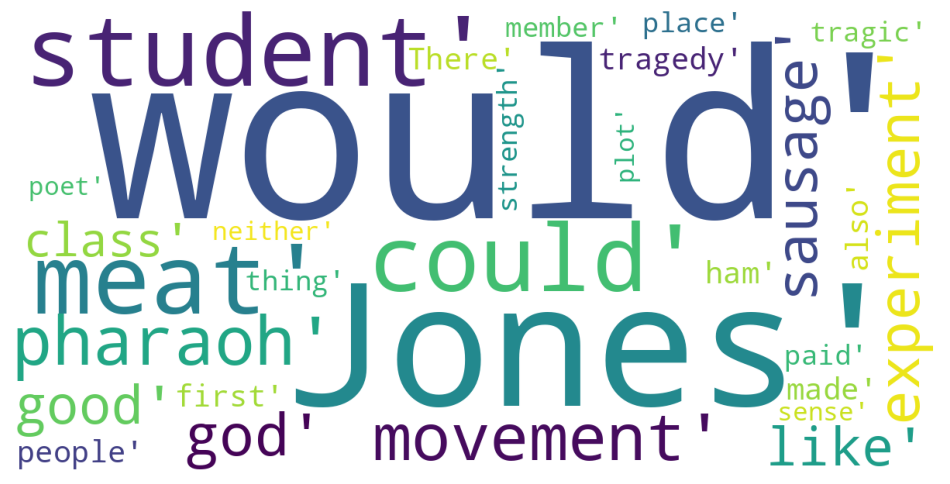

In [40]:
infinitives_prompt_text = [lem.lemmatize(w) for w in corpus_prompt_text if len(w)>3] # lemmatizing only words longer than 3 characters
show_wordcloud(infinitives_prompt_text)

<a id="3_7_2"></a>
##### 3.7.2 summaries_train dataset

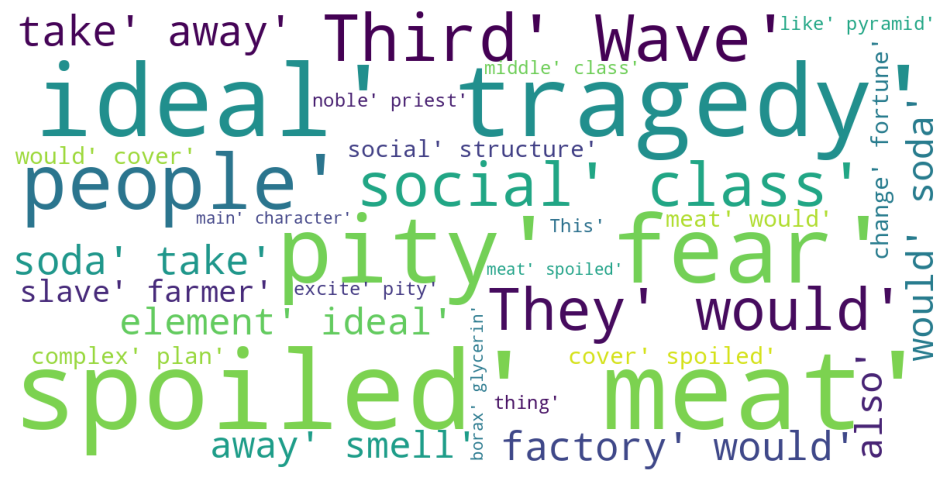

In [41]:
infinitives_summaries = [lem.lemmatize(w) for w in corpus_sumaries if len(w)>3] # lemmatizing only words longer than 3 characters
show_wordcloud(infinitives_summaries)

###### [Go to top](#top)

<a id="3_8"></a>
#### 3.8 Sentiment Analysis

In [42]:
from textblob import TextBlob

<a id="3_8_1"></a>
##### 3.8.1 prompts_train dataset

For analysing text sentiment we will use textblob library: a Python library built on top of NLTK. textblob calculates two different scores for a given text:  

- polarity: a floating-point number that lies in the range of [-1,1], where -1 means a negative statement and 1 means positive statement.  

- subjectivity: a floating-point number that lies in the range of [0,1] used to describe how someone’s judgment is shaped by personal opinions and feelings. Score 0 is attributed to the text that is fact-oriented, while score 1 points to the highly opinion-driven text. 

<a id="3_8_1_1"></a>
- ##### 3.8.1.1 Polarity

In [43]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

def sentiment(x):
    if x < -0.1:
        return 'neg'
    elif x >= -0.1 and x <= 0.1:
        return 'neu'
    else:
        return 'pos'

In [44]:
prompts_train_df['prompt_question_polarity_score'] = prompts_train_df['prompt_question'].apply(lambda x: polarity(x))
prompts_train_df['prompt_title_polarity_score'] = prompts_train_df['prompt_title'].apply(lambda x: polarity(x))
prompts_train_df['prompt_text_polarity_score'] = prompts_train_df['prompt_text'].apply(lambda x: polarity(x))

In [45]:
prompts_train_df['prompt_question_polarity_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Prompt question polarity score distribution',
        title_x=0.5,
        xaxis=dict(title='polarity score'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_title_polarity_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Prompt title polarity score distribution',
        title_x=0.5,
        xaxis=dict(title='polarity score'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_text_polarity_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Prompt text polarity score distribution',
        title_x=0.5,
        xaxis=dict(title='polarity score'),
        yaxis=dict(title='count')
    ),
    color='blue')

In [46]:
positiveness_prompt_question = prompts_train_df['prompt_question_polarity_score'].apply(lambda x: sentiment(x))
positiveness_prompt_title = prompts_train_df['prompt_title_polarity_score'].apply(lambda x: sentiment(x))
positiveness_prompt_text = prompts_train_df['prompt_text_polarity_score'].apply(lambda x: sentiment(x))

positiveness_prompt_question.iplot(
    kind='hist',
    bins=3,
    layout=dict(
        title='Prompt question sentiment',
        title_x=0.5,
        xaxis=dict(title='sentiment'),
        yaxis=dict(title='count')
    ),
    color='blue')

positiveness_prompt_title.iplot(
    kind='hist',
    bins=3,
    layout=dict(
        title='Prompt title sentiment',
        title_x=0.5,
        xaxis=dict(title='sentiment'),
        yaxis=dict(title='count')
    ),
    color='blue')

positiveness_prompt_text.iplot(
    kind='hist',
    bins=3,
    layout=dict(
        title='Prompt text sentiment',
        title_x=0.5,
        xaxis=dict(title='sentiment'),
        yaxis=dict(title='count')
    ),
    color='blue')

###### [Go to top](#top)

<a id="3_8_1_2"></a>
- ##### 3.8.1.2 Subjectivity

In [47]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [48]:
prompts_train_df['prompt_question_subjectivity_score'] = prompts_train_df['prompt_question'].apply(lambda x: subjectivity(x))
prompts_train_df['prompt_title_subjectivity_score'] = prompts_train_df['prompt_title'].apply(lambda x: subjectivity(x))
prompts_train_df['prompt_text_subjectivity_score'] = prompts_train_df['prompt_text'].apply(lambda x: subjectivity(x))

In [49]:
prompts_train_df['prompt_question_subjectivity_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Prompt question subjectivity score distribution',
        title_x=0.5,
        xaxis=dict(title='subjectivity score'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_title_subjectivity_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Prompt title subjectivity score distribution',
        title_x=0.5,
        xaxis=dict(title='subjectivity score'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_text_subjectivity_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Prompt text subjectivity score distribution',
        title_x=0.5,
        xaxis=dict(title='subjectivity score'),
        yaxis=dict(title='count')
    ),
    color='blue')

As expected, prompt questions, titles and texts are neutral and (mostly) non-opinionated. 

###### [Go to top](#top)

<a id="3_8_1_3"></a>
- ##### 3.8.1.3 Readability

A readability score is a metric that indicates how difficult (or easy) it is to read and understand a text. The following legend can help understanding the results obtained.  

90-100	very easy to read, easily understood by an average 11-year-olds

80-90	easy to read

70-80	fairly easy to read

60-70	easily understood by 13- to 15-year-olds

50-60	fairly difficult to read

30-50	difficult to read, best understood by college graduates

0-30	very difficult to read, best understood by university graduates

In [50]:
from textstat import flesch_reading_ease

In [51]:
prompts_train_df['prompt_question_readability_score'] = prompts_train_df['prompt_question'].apply(lambda x: flesch_reading_ease(x))
prompts_train_df['prompt_title_readability_score'] = prompts_train_df['prompt_title'].apply(lambda x: flesch_reading_ease(x))
prompts_train_df['prompt_text_readability_score'] = prompts_train_df['prompt_text'].apply(lambda x: flesch_reading_ease(x))

In [52]:
prompts_train_df['prompt_question_readability_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Prompt question subjectivity score distribution',
        title_x=0.5,
        xaxis=dict(title='readability score'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_title_readability_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Prompt title subjectivity score distribution',
        title_x=0.5,
        xaxis=dict(title='readability score'),
        yaxis=dict(title='count')
    ),
    color='blue')

prompts_train_df['prompt_text_readability_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Prompt text subjectivity score distribution',
        title_x=0.5,
        xaxis=dict(title='readability score'),
        yaxis=dict(title='count')
    ),
    color='blue')

The analysis shows that questions are formatted so that they are not too difficult to understand. Titles and texts are (mostly) very easy to understand with only one entry slightly more challenging. 

###### [Go to top](#top)

<a id="3_8_2"></a>
##### 3.8.2 prompts_train dataset

<a id="3_8_2_1"></a>
- ##### 3.8.2.1 Polarity

In [53]:
summaries_train_df['summary_polarity_score'] = summaries_train_df['text'].apply(lambda x: polarity(x))

summaries_train_df['summary_polarity_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Student summaries polarity score distribution',
        title_x=0.5,
        xaxis=dict(title='polarity score'),
        yaxis=dict(title='count')
    ),
    color='blue')

In [54]:
positiveness_student_summary = summaries_train_df['summary_polarity_score'].apply(lambda x: sentiment(x))

positiveness_student_summary.iplot(
    kind='hist',
    bins=3,
    layout=dict(
        title='Students summary sentiment',
        title_x=0.5,
        xaxis=dict(title='sentiment'),
        yaxis=dict(title='count')
    ),
    color='blue')

<a id="3_8_2_2"></a>
- ##### 3.8.2.2 Subjectivity

In [55]:
summaries_train_df['summary_subjectivity_score'] = summaries_train_df['text'].apply(lambda x: subjectivity(x))

summaries_train_df['summary_subjectivity_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Student summaries subjectivity score distribution',
        title_x=0.5,
        xaxis=dict(title='subjectivity score'),
        yaxis=dict(title='count')
    ),
    color='blue')

Compared to prompts, student summaries are substantially less neutral (i.e. more positive or negative) and are more opinionated. However, a large peak in subjectivity score exists at 0 which shows that some students managed to stay objective in their summaries. It could be beneficial to investigate whether there is a correlation between final grade (score) student was given and subjectivity/polarity. 

<a id="3_8_2_3"></a>
- ##### 3.8.1.3 Readability

In [56]:
summaries_train_df['summary_readability_score'] = summaries_train_df['text'].apply(lambda x: flesch_reading_ease(x))

summaries_train_df['summary_readability_score'].iplot(
    kind='hist',
    bins=120,
    layout=dict(
        title='Student summaries subjectivity score distribution',
        title_x=0.5,
        xaxis=dict(title='readability score'),
        yaxis=dict(title='count')
    ),
    color='blue')

Compared to prompt text, students' summaries are written in less advanced language and are much easier to read with mean readability score of 73. However, the distribution is negatively skewed with pronounced left tail. This could indicate some correlation between the language complexity students used and the grade they were awarded (possibly higher grade than average) for their summaries. 

###### [Go to top](#top)